<a href="https://colab.research.google.com/github/soumyaksd/Calculator/blob/master/Adult_dataset_XAI_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np
#import model_evaluation_utils as meu
import matplotlib.pyplot as plt
from collections import Counter
import shap
import eli5
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [0]:
%matplotlib inline

In [5]:
shap.initjs()

data, labels = shap.datasets.adult(display=True)
labels = np.array([int(label) for label in labels])

In [0]:
categorical_features_indices = np.where(data.dtypes =='category')[0]
cat_cols = data.select_dtypes(['category']).columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.cat.codes)

In [7]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
X_train.head(3)

(22792, 12) (9769, 12)


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
19749,34.0,6,9.0,2,5,5,4,0,0.0,2179.0,12.0,39
1216,48.0,6,10.0,2,3,0,0,1,7688.0,0.0,40.0,39
27962,23.0,7,10.0,2,10,0,4,1,0.0,0.0,30.0,39


In [8]:
data_disp, labels_disp = shap.datasets.adult(display=True)
X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(data_disp, labels_disp, test_size=0.3, random_state=42)
print(X_train_disp.shape, X_test_disp.shape)
X_train_disp.head(3)




(22792, 12) (9769, 12)


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
19749,34.0,Self-emp-not-inc,9.0,Married-civ-spouse,Farming-fishing,Wife,White,Female,0.0,2179.0,12.0,United-States
1216,48.0,Self-emp-not-inc,10.0,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688.0,0.0,40.0,United-States
27962,23.0,State-gov,10.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,30.0,United-States


In [9]:
import xgboost as xgb
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  8 10:51:07 2019

@author: Soumya
"""

from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)



In [11]:
predictions = xgc.predict(X_test)
predictions[:10]

class_labels = list(set(labels))
display_model_performance_metrics(true_labels=y_test, 
                                      predicted_labels=predictions, 
                                      classes=class_labels)


Model Performance metrics:
------------------------------
Accuracy: 0.8712
Precision: 0.8671
Recall: 0.8712
F1 Score: 0.8681

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.76      0.67      0.71      2314

   micro avg       0.87      0.87      0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       6972   483
        1        775  1539


In [12]:
xgc_np = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                           objective='binary:logistic', random_state=42)
xgc_np.fit(X_train.values, y_train)
#global interprations


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

**Shapley** value is the “average marginal contribution of a feature value over all possible coalitions.” 

i.e. Shapley values consider all possible predictions for an instance using all possible combinations of inputs. 
SHAP guarantees properties like consistency and local accuracy.

LIME (Local Interpretable Model-agnostic Explanations) builds sparse linear models around each prediction to explain how the black box model works in that local vicinity. 
LIME is actually a subset of SHAP but lacks the same properties. 

 LIME is fast, while Shapley values take a long time to compute. 

In [13]:
explainer = shap.TreeExplainer(xgc)
shap_values = explainer.shap_values(X_test)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head()



Expected Value: -1.3625857


,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.209206,-0.003895,-0.073927,-1.078541,-0.645259,-0.517731,-0.002871,-0.421329,-0.144742,-0.036394,-0.568053,-0.004587
1,0.354368,-0.262398,-0.483883,0.586233,0.307967,1.194750,0.017408,-0.216272,-0.108322,-0.048158,-0.095782,0.017657
2,-0.525650,0.030637,0.970991,0.360480,0.528695,0.603971,-0.103895,0.050630,-0.176231,-0.087669,0.509656,0.024573
3,-0.426095,0.076188,0.576406,-1.108961,-0.517884,-0.522604,0.028896,-0.359869,-0.142805,-0.057430,-0.250736,0.023183
4,-0.503867,-0.159754,-0.129339,-0.547773,-0.049194,-0.414065,-0.019701,0.128197,-3.685364,-0.031033,0.781617,0.001285


A matrix of **SHAP** values (samples, features). 

Each row sums to the difference between the predicted output for that sample and the expected output. Typically this difference helps us in explaining why the model is inclined on predicting a specific class outcome.

In [20]:
y_test_disp[0]

False

In [22]:
y_test_disp[2]

True

***Predicting when a person’s income <= $50K-WHY Explained***

Shows which features were the most influential.

Shows contributuion of each feature to push the model output from the base value (the average model output over the training dataset ) to the actual model output.

Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue

In [18]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], X_test_disp.iloc[0,:])



***Predicting when a person’s income > $50K***

In [23]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[2,:], X_test_disp.iloc[2,:])



***Explaining multiple predictions***

In [25]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[:200,:], X_test_disp.iloc[:200,:])



***Feature Importances***

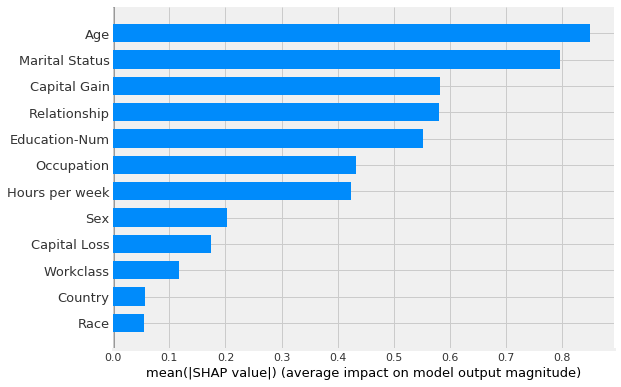

In [0]:
shap.summary_plot(shap_values, 
                  X_test, plot_type="bar")



***Summary Plot***

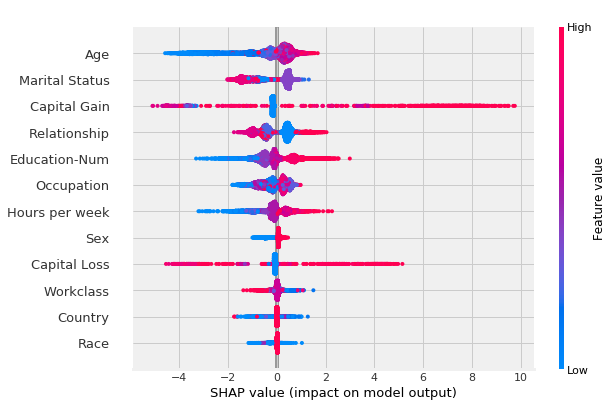

In [0]:
shap.summary_plot(shap_values, X_test)



***Partial dependence plots of ‘Age’ affecting model prediction***

Shows that middle-aged people have a slightly higher shap value, pushing the model’s predictions to 1 as compared to younger or older people who earn less.

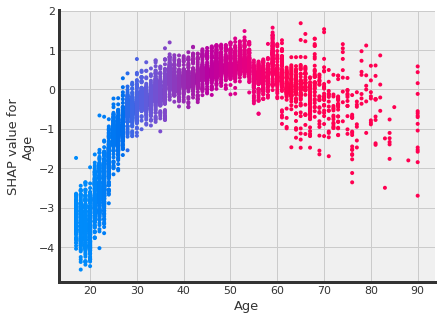

In [0]:
shap.dependence_plot(ind='Age', interaction_index='Age',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test_disp)



***Partial dependence plots of ‘Education-Num’ affecting model prediction.***

Insight- Married people with relationship status of either husband or wife having the highest chance of making more money hence highest SHAP value.

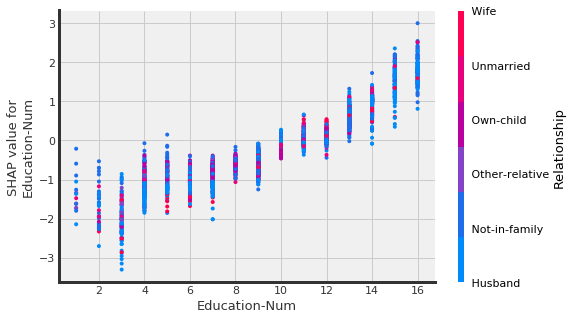

In [0]:
shap.dependence_plot(ind='Education-Num', interaction_index='Relationship', 
                     shap_values=shap_values, features=X_test, 
                     display_features=X_test_disp)

In [26]:
import sklearn
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
y

array([False, False, False, ..., False, False,  True])

In [35]:
shap.initjs()
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values_single = explainer.shap_values(X.iloc[len(y)-1,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values_single, X_display.iloc[len(y)-1,:])


In [34]:
shap.initjs()
shap_values_single2 = explainer.shap_values(X.iloc[0,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values_single2, X_display.iloc[0,:])

In [0]:
shap_values_single

array([ 0.04238095,  0.02238095, -0.01095238, -0.09428571, -0.06761905,
       -0.13761905,  0.        ,  0.        , -0.15428571,  0.        ,
        0.        ,  0.        ])

In [0]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(X_train, Y_train)
print_accuracy(nn.predict)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [0]:
import sklearn
svc_linear = sklearn.svm.SVC(kernel='linear', probability=True)
svc_linear.fit(X_train, y_train)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)